In [1]:
#loading required libraries
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt
from scipy.misc import toimage
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [2]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

In [187]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

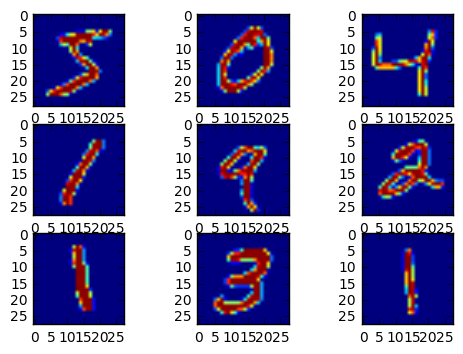

In [188]:
# load data the cifar10 data  into training and test 
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

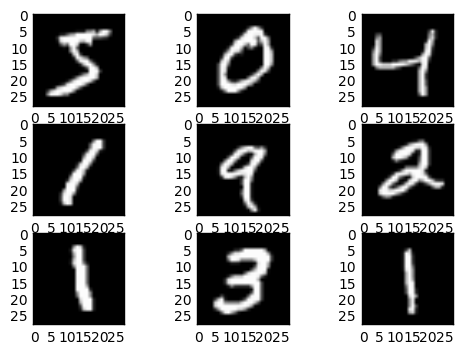

In [189]:
# load data the cifar10 data  into training and test 
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]), cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [190]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [191]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [192]:
X_train.shape

(60000, 1, 28, 28)

In [193]:
# one hot encode outputs
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [194]:
num_classes

10

In [195]:
# Create the model
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
Conv_NN10_1layer = Sequential()
Conv_NN10_1layer.add(Conv2D(64, (3, 3), input_shape=(1,28, 28), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
Conv_NN10_1layer.add(Dropout(0.2))
Conv_NN10_1layer.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
Conv_NN10_1layer.add(MaxPooling2D(pool_size=(2, 2)))
Conv_NN10_1layer.add(Flatten())
Conv_NN10_1layer.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
Conv_NN10_1layer.add(Dropout(0.5))
Conv_NN10_1layer.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 20
lrate = 0.005
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
Conv_NN10_1layer.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(Conv_NN10_1layer.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 64, 28, 28)        640       
_________________________________________________________________
dropout_55 (Dropout)         (None, 64, 28, 28)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 64, 28, 28)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 14, 14)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               6423040   
_________________________________________________________________
dropout_56 (Dropout)         (None, 512)               0         
__________

In [196]:
# Fit the model
#Conv_NN10_1layer.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
Conv_NN10_1layer.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
  768/60000 [..............................] - ETA: 1301s - loss: 2.2959 - acc: 0.0898

KeyboardInterrupt: 

In [169]:
# Final evaluation of the model
scores = Conv_NN10_1layer.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

ValueError: Input arrays should have the same number of samples as target arrays. Found 10000 input samples and 100000 target samples.

In [15]:
early_stopping_monitor = EarlyStopping(patience=2)

In [20]:
from keras.models import load_model
Conv_NN10_1layer.save('Conv_NN10_1layer.h5')
Conv_NN10_1layer1=load_model('Conv_NN10_1layer.h5')

In [21]:
Conv_NN10_1layer1=load_model('Conv_NN10_1layer.h5')

In [30]:
# Create the model
Conv_NN10_multilayer = Sequential()
Conv_NN10_multilayer.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28), activation='relu', padding='same'))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(MaxPooling2D(pool_size=(2, 2)))
Conv_NN10_multilayer.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(MaxPooling2D(pool_size=(2, 2)))
Conv_NN10_multilayer.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
Conv_NN10_multilayer.add(MaxPooling2D(pool_size=(2, 2)))
Conv_NN10_multilayer.add(Flatten())
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
Conv_NN10_multilayer.add(Dropout(0.2))
Conv_NN10_multilayer.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 30
lrate = 0.008
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
Conv_NN10_multilayer.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(Conv_NN10_multilayer.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 28, 28)        640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 28, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 28, 28)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 14, 14)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 14, 14)       147584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 14, 14)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 14, 14)       295168    
__________

In [198]:
Conv_NN10_multilayer.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.15,callbacks=[early_stopping_monitor])

Train on 51000 samples, validate on 9000 samples
Epoch 1/10


KeyboardInterrupt: 

In [136]:
# Final evaluation of the model
scores = Conv_NN10_multilayer.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

KeyboardInterrupt: 

In [53]:
a=[]
s=Conv_NN10_multilayer.predict(X_test, batch_size=64, verbose=0)
for i in range(len(s)):
        for j in range(len(s[i,])):
                if s[i,j]==max(s[i,]):
                    a.append(j)

In [58]:
X_test.shape

(10000, 1, 28, 28)

In [55]:
predictions=pd.DataFrame(a)

In [56]:
from keras.models import load_model
Conv_NN10_multilayer.save('Conv_NN10_multilayer.h5')

In [57]:
predictions.to_csv("predictions.csv")

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

#handy function to plot image with its label
def plot_image(images, labels, index):
    plt.imshow(images [index].reshape(28, 28), cmap="Greys", interpolation="None")
    plt.title(labels [index])

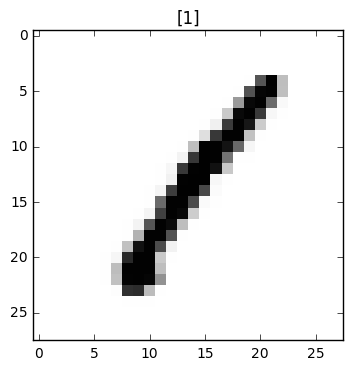

In [118]:
plot_image(train_images, train_labels, 0)

In [20]:
import numpy as np
import pandas as pd

# Creating the training and test dataset
training_dataset = pd.read_csv("train.csv")
y_train = training_dataset[[0]].values.ravel()
x_train = training_dataset.iloc[:,1:].values
testing_dataset = pd.read_csv("test.csv").values

In [47]:
testing_dataset1 = pd.read_csv("test.csv").values

In [50]:
print(testing_dataset1[1])

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [21]:
print(training_dataset.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [22]:
training_dataset.shape

(42000, 785)

In [23]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [24]:
y_train = y_train.astype(np.uint8)
x_train = np.array(x_train).reshape((-1, 1, 28, 28)).astype(np.uint8)
testing_dataset = np.array(testing_dataset).reshape((-1, 1, 28, 28)).astype(np.uint8)

In [27]:
x_train = x_train / 255


In [34]:
testing_dataset=testing_dataset/255

In [25]:
# one hot encode outputs
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
num_classes = y_train.shape[1]

In [28]:
x_train[1]

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.  

In [31]:
Conv_NN10_multilayer.fit(x_train, y_train, epoch=10, batch_size=64,validation_split=0.1,callbacks=[early_stopping_monitor])

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 29120s - loss: 0.6693 - acc: 0.7691 - val_loss: 0.1002 - val_acc: 0.9648
Epoch 2/10
37800/37800 [==============================] - 5681s - loss: 0.1176 - acc: 0.9631 - val_loss: 0.0601 - val_acc: 0.9786
Epoch 3/10
37800/37800 [==============================] - 6495s - loss: 0.0799 - acc: 0.9751 - val_loss: 0.0592 - val_acc: 0.9774
Epoch 4/10
37800/37800 [==============================] - 6249s - loss: 0.0630 - acc: 0.9814 - val_loss: 0.0459 - val_acc: 0.9838
Epoch 5/10
37800/37800 [==============================] - 5667s - loss: 0.0525 - acc: 0.9839 - val_loss: 0.0372 - val_acc: 0.9869
Epoch 6/10
37800/37800 [==============================] - 8319s - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0391 - val_acc: 0.9871
Epoch 7/10
37800/37800 [==============================] - 19421s - loss: 0.0365 - acc: 0.9889 - val_loss: 0.0296 - val_acc: 0.9890
Epoch 8/10
37800/37800 [===============

In [63]:
Conv_NN10_multilayer.fit(x_train, y_train, epoch=5,batch_size=64,callbacks=[early_stopping_monitor])

TypeError: Unrecognized keyword arguments: {'epoch': 5}

In [56]:
a=[]
s=Conv_NN10_multilayer.predict(testing_dataset, batch_size=64, verbose=0)

In [57]:
for i in range(len(s)):
        for j in range(len(s[i,])):
                if s[i,j]==max(s[i,]):
                    a.append(j)

In [58]:
len(a)

28000

In [59]:
prediction=pd.DataFrame(a)

In [60]:
prediction.shape

(28000, 1)

In [61]:
prediction.to_csv("Prediction.csv")

In [46]:
pwd

'/Users/ashokvardhan/Documents/Digit-Recognizer'